In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=bd56bb47b3a02d5f0b84756835e52a5e13b2bbe16108d77654e71f79d7436ca7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
import sklearn
import pandas as pd

Следующую строчку не выполнять, здесь показан пример по генерации точек.

In [ ]:
from sklearn.datasets import make_blobs
sklearn.datasets.make_blobs(n_samples=100, n_features=1, centers=1, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=10, return_centers=True)

Возьмём 1000 точек и два совмещённых центра, отвечающих за расположение двух групп по 500 точек в каждым. Центрами считаем географический центр Москвы.

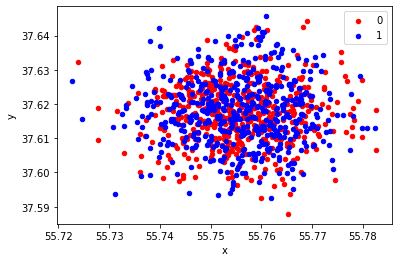

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

#Moscow geo center, twice.
centers = [[55.755864, 37.617698],[55.755864, 37.617698]]

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, \
                  shuffle=True, random_state=10, return_centers=False,\
                  cluster_std=0.01)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Выгрузим данные в виде датасета, где x и y - координаты объекта, label - пометка, к какой группе относится конкретный объект.

In [ ]:
df

,x,y,label
0,55.761134,37.606872,1
1,55.759816,37.612757,1
2,55.765730,37.617980,0
3,55.753923,37.600231,0
4,55.748250,37.618289,1
...,...,...,...
995,55.745146,37.625082,1
996,55.735993,37.611290,0
997,55.770251,37.607662,1
998,55.760559,37.625455,0


In [ ]:
l0 = len(df[df['label'] == 0])
l1 = len(df[df['label'] == 1])

In [ ]:
l0, l1

(500, 500)

Как видим, мы синтезировали объекты близкого/одинакового размера.

***

[Как создать список случайных чисел](https://ru.stackoverflow.com/questions/565846/%D0%9A%D0%B0%D0%BA-%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D1%82%D1%8C-%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA-%D0%B8%D0%B7-%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D1%85-%D1%86%D0%B5%D0%BB%D1%8B%D1%85-%D1%87%D0%B8%D1%81%D0%B5%D0%BB-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F-%D1%81%D0%BF%D0%B8%D1%81%D0%BA%D0%BE%D0%B2%D0%BE%D0%B5-%D0%B2%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%BD%D0%B8%D0%B5)

[Взял отсюда](https://www.geeksforgeeks.org/generating-random-number-list-in-python/)

In [ ]:
#import numpy as np

In [ ]:
#import numpy as np
 
## generates list of 4 float values
#print(np.random.random_sample(size = 4))
 
## generates 2d list of 4*4
#print(np.random.random_sample(size = (4,4)))

[0.15568742 0.12250766 0.57171833 0.88777736]
[[0.54779403 0.75096325 0.35032384 0.56737233]
 [0.80344342 0.62513162 0.36391004 0.3461914 ]
 [0.15245305 0.88676215 0.53277215 0.07797299]
 [0.19598568 0.11949772 0.99973801 0.83950475]]


In [ ]:
#print(np.random.random_sample(size = 2))

[0.92341946 0.0244175 ]


In [ ]:
#import timeit, random, itertools, operator, functools, numpy

#a, b, s = -10, 10, 1000
#v10=lambda: numpy.random.randint(a, b, s).tolist()


***

У нас две группы. Зададим объектам из каждой группы параметр, который характеризует важность данного объекта. В случае первой группы, с label==0 этот коэффициент будет удалять объекты, поскольку мы возьмём этот коэффициент большим, по сравнению с коэффиентом для второй группы, где у нас label==1.

In [ ]:
import random
import numpy as np
a0, b0 = 0.8, 1.0  #постаматы, фиктивно дальше расстояние, предложение     
a1, b1 = 0.6, 0.9  #группы, куда лучше ставить, спрос, становятся ближе

# сделаем рандомный коэффициент изменения расстояния до точек интереса

coeff_gr0 = np.random.random_sample(size = l0) * (b0 - a0) + a0
coeff_gr1 = np.random.random_sample(size = l1) * (b1 - a1) + a1

Посмотрим для проверки в каких пределах у нас сгенерились коэффициенты важности объектов для обоих групп:

In [ ]:
min(coeff_gr0), max(coeff_gr0) #label==0

(0.8001783624730665, 0.9991029357683786)

In [ ]:
min(coeff_gr1), max(coeff_gr1) #label==1

(0.6010076665687666, 0.899290554511557)

In [ ]:
#len(coeff_gr0), len(coeff_gr1)

(500, 500)

###### Первичный вариант решения, скрыл ячейки.  Не надо выполнять.

In [ ]:
#data = df.copy()

In [ ]:
#len(data)

1000

In [ ]:
#data.sample(5)

,x,y,label
747,55.730827,37.613382,1
963,55.749721,37.626069,0
322,55.747130,37.609727,1
51,55.751954,37.630250,0
240,55.737015,37.610523,0


Добавим колонку к датафрему data, где будут отображены коэффициенты, приближающие наши объекты, в зависимости от расстояния к ним. Постаматы, которые сейчас есть, будут дальше, у меня это группа 0, а объекты, типа многоквартирных домов без постоматов (если в группе 1 есть постаматы группы 0 их нужно определить в группу 0); в группе 1 наоборот коэффициенты меньше, что фактически приближает их. 

In [ ]:
#pd.Series(coeff_gr0) | pd.Series(coeff_gr1)

In [ ]:
#coeff_gr0, coeff_gr1

In [ ]:
#df['Normalized'] = df['Budget'].where(df['Currency']=='$', df['Budget'] * 0.78125)

In [ ]:
#data = df.copy()

In [ ]:
#data['coeff_gr'] = 1

In [ ]:
#data['coeff_gr0'] = data['coeff_gr'].where(data['label']==0, pd.Series(coeff_gr0))
#data['coeff_gr1'] = data['coeff_gr'].where(data['label']==1, pd.Series(coeff_gr1))

In [ ]:
#data[data['label']==0].loc['coeff_gr'] = pd.Series(coeff_gr0)
#data['coeff_gr1'] = data['coeff_gr'].where(data['label']==1, pd.Series(coeff_gr1))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
#df['Normalized'] = df['Budget'].where(df['Currency']=='$', df['Budget'] * 0.78125)

In [ ]:
#data.sample(7)

,x,y,label,coeff_gr,coeff_gr0,coeff_gr1
760,55.758469,37.619680,0,1,1.000000,NaN
216,55.750919,37.638265,1,1,0.922927,1.000000
560,55.759012,37.642375,0,1,1.000000,NaN
72,55.745817,37.623613,0,1,1.000000,0.606500
589,55.767733,37.606586,1,1,NaN,1.000000
210,55.751723,37.616410,0,1,1.000000,0.772254
56,55.755050,37.626129,1,1,0.876423,1.000000


In [ ]:
#data['coeff_gr'].isna().sum()

0

[Частичное заполнение списком](https://question-it.com/questions/3342560/kak-sozdat-chastichno-zapolnennyj-stolbets-v-pandah)  
Полезная вещь, использую такой способ задания нового столбца далее.

In [ ]:
#df = pd.DataFrame(np.arange(1, 51).reshape((5, -1)).T)
#s1 = pd.Series([11, 12, 13, 14, 15, 16], index=[0, 1, 2, 3, 7, 9])
#s2 = pd.Series([27, 28], index=[4, 6])
#sources = [s1, s2]

In [ ]:
#df = df.assign(foo='')

In [ ]:
#for src in sources:
#    df.foo.update(other=src)

# **Здесь правильное продолжение.**

[Как создать частично заполненный столбец в пандах](https://question-it.com/questions/3342560/kak-sozdat-chastichno-zapolnennyj-stolbets-v-pandah)  
Использую данный способ генерации нового столбца (смотри единственный ответ по этой ссылке), чтобы сформировать новую колонку, где каждой точке из разных групп соотвествовали коэффициенты важности объекта в заданных ранее диапазонах.


In [ ]:
data = df.copy()

In [ ]:
data = data.assign(coeff_gr='')

In [ ]:
data

,x,y,label,coeff_gr
0,55.761134,37.606872,1,
1,55.759816,37.612757,1,
2,55.765730,37.617980,0,
3,55.753923,37.600231,0,
4,55.748250,37.618289,1,
...,...,...,...,...
995,55.745146,37.625082,1,
996,55.735993,37.611290,0,
997,55.770251,37.607662,1,
998,55.760559,37.625455,0,


Надо создать два списка индексов для разных групп.

[Как найти индексы в датафрейме пандас по определённому условию](https://stackoverflow.com/questions/42386629/pandas-find-index-of-value-anywhere-in-dataframe)

Найдём индексы строк в датафрейме data, которые соответствуют нашим группам.

In [ ]:
ind_gr0 = data[data['label']==0].index.tolist()
ind_gr1 = data[data['label']==1].index.tolist()

Создадим Series, куда внесём коэффициенты важности объектов, согласно индексам, полученным выше.

In [ ]:
s1 = pd.Series(coeff_gr0, index=ind_gr0)
s2 = pd.Series(coeff_gr1, index=ind_gr1)
sources = [s1, s2]

Занесём данные в новый столбец 'coeff_gr' датафрейма data.

In [ ]:
for src in sources:
    data.coeff_gr.update(other=src)

Получили новые данные:

In [ ]:
data.sample(10)

,x,y,label,coeff_gr
877,55.752706,37.604809,0,0.820229
186,55.763430,37.610404,0,0.900035
824,55.751050,37.609589,0,0.963705
715,55.751506,37.623061,0,0.810972
782,55.742597,37.619002,1,0.842577
349,55.757340,37.632333,1,0.748179
899,55.747603,37.614053,1,0.652513
456,55.739515,37.622047,0,0.940442
557,55.754878,37.615588,1,0.895038
408,55.746174,37.626340,0,0.88816


У нас коэффициенты меняются запланировано:

In [ ]:
min(data[data.label==0].coeff_gr), max(data[data.label==0].coeff_gr) 

(0.8001783624730665, 0.9991029357683786)

In [ ]:
min(data[data.label==1].coeff_gr), max(data[data.label==1].coeff_gr) 

(0.6010076665687666, 0.899290554511557)

In [ ]:
len(data[data.label==0].coeff_gr) , len(data[data.label==0].coeff_gr)

(500, 500)

***

Вытащим любую точку и ближайшие к ним.  Можно вытащить из постамата, можно сделать некую рандомную в диапазоне. Лучше сделать так. Выбрать произвольную точку и посчитать расстояние до всех точек из выбора.

In [ ]:
data.sample(5)

,x,y,label,coeff_gr
128,55.776944,37.626815,0,0.837316
957,55.749001,37.623488,1,0.71975
6,55.767859,37.622485,1,0.876336
812,55.742973,37.607956,0,0.97171
587,55.755988,37.612235,1,0.758157


Определим границы, в которых мы выберем произвольную точку:

In [ ]:
#Диапазон по оси x
min_datax = min(data['x'])
max_datax = max(data['x'])

#Диапазон по оси y
min_datay = min(data['y'])
max_datay = max(data['y']) 

Тогда post_x и post_y это случайное положение постамата на карте в пределах рассматриваемого диапазона.

In [ ]:
#a0, b0 = 0.8, 1.0  #постаматы, фиктивно дальше расстояние, предложение     
#a1, b1 = 0.6, 0.9  #группы, куда лучше ставить, спрос, становятся ближе

# сделаем рандомный коэффициент изменения расстояния до точек интереса

post_x = np.random.random_sample(size = 1) * (max_datax - min_datax) + min_datax
post_y = np.random.random_sample(size = 1) * (max_datay - min_datay) + min_datay

Таким образом это случайное расположение постамата:

In [ ]:
post_x, post_y

(array([55.74570304]), array([37.59694394]))

У нас есть первичная таблица и новая точка, найдём все расстояния между данной точкой и другими, создадим новую колонку 'r_pxpy', в которую поместим расстояния до новой случайной точки \[post_x, post_y\]. И новую точку можно ввести в датафрейм data в качестве новой строки. Можно задать числовой индекс. Например у нас сейчас 1000 точек (можно варьировать), а индекс будет на одну цифру больше, т.е. '1001', можно задать и строковый индекс, чтобы наверняка отделить новую (новые) точки от первоначальных точек.  

In [ ]:
data.head(2)

,x,y,label,coeff_gr
0,55.761134,37.606872,1,0.60177
1,55.759816,37.612757,1,0.715903


*** 
Можно использовать и хитрые функции для вычисления расстояния. Воспользуемся для простоты модели евклидовом расстоянием. Можно использовать функцию:

In [ ]:
def r(x, y):
    r = (x*x+y*y)**0.5
    return r  

In [ ]:
r(2,7) 

7.280109889280518

***

Для прослеживания за наполнением датафрейма data снова выведем пять произвольных данных: 

In [ ]:
data.sample(5)

,x,y,label,coeff_gr
675,55.753327,37.630247,0,0.968362
343,55.742341,37.608400,1,0.711256
315,55.759488,37.597149,1,0.775505
769,55.761346,37.606181,1,0.747661
181,55.766661,37.613070,0,0.801082


Создадим объект Series, в котором будет нормированное евклидово расстояние по координатам от новой точки \[post_x, post_y\] до всех первоначальных точек.

In [ ]:
r_pxpy = ( (data.x - post_x)**2 + (data.y - post_y)**2 ) ** 0.5
r_pxpy 

0      0.018349
1      0.021196
2      0.029045
3      0.008853
4      0.021497
         ...   
995    0.028144
996    0.017323
997    0.026785
998    0.032149
999    0.012870
Length: 1000, dtype: float64

Занесём полученный Series в качестве новой одноимённой колонки 'r_pxpy' в наш датафрейм data.

In [ ]:
data = data.assign(r_pxpy='')

In [ ]:
data.r_pxpy.update(other=r_pxpy)  

Появилась новая колонка:

In [ ]:
data.head(5)

,x,y,label,coeff_gr,r_pxpy
0,55.761134,37.606872,1,0.752759,0.018349
1,55.759816,37.612757,1,0.641111,0.021196
2,55.765730,37.617980,0,0.836306,0.029045
3,55.753923,37.600231,0,0.806853,0.008853
4,55.748250,37.618289,1,0.836411,0.021497


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         1000 non-null   float64
 1   y         1000 non-null   float64
 2   label     1000 non-null   int64  
 3   coeff_gr  1000 non-null   object 
 4   r_pxpy    1000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


Новые колонки имеют тип object, переведём их в тип float. Когда нужно будет добавлять новые колонки, строки, желательно сразу переводить данные во float.

In [ ]:
data['coeff_gr'] = data['coeff_gr'].astype(float) 
data['r_pxpy'] = data['r_pxpy'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         1000 non-null   float64
 1   y         1000 non-null   float64
 2   label     1000 non-null   int64  
 3   coeff_gr  1000 non-null   float64
 4   r_pxpy    1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


Теперь ради чего всё затеивалось, выделим, к примеру несколько ближних точек.  
Тем самым мы перейдём от датафрейма data к маленькому датафрейму datasm.

In [ ]:
nnp = 10 #number of nearest points
datasm = data.nsmallest(nnp, 'r_pxpy')
datasm

,x,y,label,coeff_gr,r_pxpy
551,55.744559,37.598285,0,0.965536,0.001763
259,55.743787,37.597618,0,0.866930,0.002031
774,55.746861,37.598688,0,0.834427,0.002093
544,55.744626,37.599124,0,0.985040,0.002432
771,55.745801,37.593880,1,0.770219,0.003066
82,55.743294,37.599498,1,0.672995,0.003511
141,55.746046,37.601664,1,0.830751,0.004732
969,55.740686,37.598478,0,0.976199,0.005246
625,55.747640,37.601832,0,0.806571,0.005258
55,55.741441,37.601609,0,0.941507,0.006319


Вспомним, сколько у нас первоначально точек было.

In [ ]:
len(data)

1000

Добавим нашу рандомную точку \[post_x, post_y\] в наш новый датафрейм data_sm либо с наверняка не занятым индексом '1000' либо каким-нибудь строковым индексом. Также сделаем первое приближение \[post_xmean, post_ymean\], просто среднее значение по x и по y всех наших ближайших объектов в качестве первого приближения положения нового постамата.

In [ ]:
post_x, post_y

(array([55.74570304]), array([37.59694394]))

In [ ]:
post_xmean = datasm.x[0:nnp].sum()/len(datasm.x[0:nnp])
post_ymean = datasm.y[0:nnp].sum()/len(datasm.y[0:nnp])
post_xmean, post_ymean

(55.74447424479761, 37.59906766012384)

Видно, что точка уже занимает другое положение.

***

Создадим ещё один столбец в данных, приблизим/удалим объекты, согласно коэффициентам. Таким образом это будет модель, где мы учитываем важность объектов. Сначала пересчитаем расстояния с учётом коэффициентов важности объектов и только потом вычислим новое положение, также, как мы поступили чуть выше, усреднив координаты по x и по y. Наша задача определить ещё одну точку \[post_xmean_gr, post_ymean_gr\]


Подзадача состоит из двух пунктов, сначала мы добавим новую колонку в датафрейм datasm, назовём её 'r_pxpy_gr' в неё внесём вычисляемое ниже расстояние до объектов с учётом коэффициента близости до объектов. Вторым шагом надо будет найти новые воображаемые координаты до объектов (можно внести в датафрейм).

In [ ]:
r_pxpy_gr = datasm.r_pxpy * datasm.coeff_gr
r_pxpy_gr

551    0.001702
259    0.001761
774    0.001747
544    0.002395
771    0.002361
82     0.002363
141    0.003931
969    0.005121
625    0.004241
55     0.005950
dtype: float64

In [ ]:
datasm = datasm.assign(r_pxpy_gr='')

In [ ]:
datasm.r_pxpy_gr.update(other=r_pxpy_gr)

In [ ]:
datasm

,x,y,label,coeff_gr,r_pxpy,r_pxpy_gr
551,55.744559,37.598285,0,0.965536,0.001763,0.001702
259,55.743787,37.597618,0,0.866930,0.002031,0.001761
774,55.746861,37.598688,0,0.834427,0.002093,0.001747
544,55.744626,37.599124,0,0.985040,0.002432,0.002395
771,55.745801,37.593880,1,0.770219,0.003066,0.002361
82,55.743294,37.599498,1,0.672995,0.003511,0.002363
141,55.746046,37.601664,1,0.830751,0.004732,0.003931
969,55.740686,37.598478,0,0.976199,0.005246,0.005121
625,55.747640,37.601832,0,0.806571,0.005258,0.004241
55,55.741441,37.601609,0,0.941507,0.006319,0.00595


Вычислим координаты точек, куда мы фиктивно переместим объекты с учётом коэффициентов.  

In [ ]:
x_gr = post_x +  datasm.r_pxpy_gr * np.cos ( np.arctan ((datasm.y - post_y)/(datasm.x - post_x)) )
y_gr = post_y +  datasm.r_pxpy_gr * np.sin ( np.arctan ((datasm.y - post_y)/(datasm.x - post_x)) )
x_gr = x_gr.astype('float')
y_gr = y_gr.astype('float')

In [ ]:
x_gr[551], y_gr[551] # видно, что точка переместилась.

(55.74680742287525, 37.595649085067556)

Осталось найти усреднённое положение новой точки \[post_xmean_gr, post_ymean_gr\] по аналогии, донести/занести всё в таблицу и отобразить на графике разным цветом. Причём координаты x_gr y_gr для дальнейшего расчёта надо занести в первую очередь!!!

Значит координаты:

In [ ]:
datasm = datasm.assign(x_gr='')
datasm = datasm.assign(y_gr='')

In [ ]:
datasm.x_gr.update(other=x_gr)
datasm.y_gr.update(other=y_gr)

In [ ]:
datasm

,x,y,label,coeff_gr,r_pxpy,r_pxpy_gr,x_gr,y_gr
551,55.744559,37.598285,0,0.965536,0.001763,0.001702,55.746807,37.595649
259,55.743787,37.597618,0,0.866930,0.002031,0.001761,55.747364,37.596359
774,55.746861,37.598688,0,0.834427,0.002093,0.001747,55.746669,37.598399
544,55.744626,37.599124,0,0.985040,0.002432,0.002395,55.746764,37.594796
771,55.745801,37.593880,1,0.770219,0.003066,0.002361,55.745778,37.594584
82,55.743294,37.599498,1,0.672995,0.003511,0.002363,55.747324,37.595225
141,55.746046,37.601664,1,0.830751,0.004732,0.003931,55.745988,37.600865
969,55.740686,37.598478,0,0.976199,0.005246,0.005121,55.750601,37.595446
625,55.747640,37.601832,0,0.806571,0.005258,0.004241,55.747266,37.600887
55,55.741441,37.601609,0,0.941507,0.006319,0.00595,55.749716,37.592551


Вычислим \[post_xmean_gr, post_ymean_gr\] по координатам 'x_gr' и 'y_gr'.

In [ ]:
post_xmean_gr = datasm.x_gr[0:nnp].sum()/len(datasm.x_gr[0:nnp])
post_ymean_gr = datasm.y_gr[0:nnp].sum()/len(datasm.y_gr[0:nnp])
post_xmean_gr, post_ymean_gr

(55.74742771676275, 37.596476187469115)

Внесём в наша датасет три новых строчки и дадим им разный label, отличающийся на единицу и возможно некоторое расстояние, если оно уместно, важно нам отобразить координаты x и y в изначальной системе координат. Это вся магия сейчас для построения графиков. У нас основной промежуточный датасет datasm, можем сделать и его копию. Для построения графиков. Если будут увеличиваться модели, просто с этого шага надо учитывать все новые точки новых моделей.

Вот наши три точки:   
\[post_x, post_y\] - случайная точка на карте  
\[post_xmean, post_ymean\] - приближение по среднему  
\[post_xmean_gr, post_ymean_gr\] - приближение с учётом коэффициентов близости по среднему  

In [ ]:
datasm_2plot = datasm.copy()

In [ ]:
datasm_2plot

,x,y,label,coeff_gr,r_pxpy,r_pxpy_gr,x_gr,y_gr
551,55.744559,37.598285,0,0.965536,0.001763,0.001702,55.746807,37.595649
259,55.743787,37.597618,0,0.866930,0.002031,0.001761,55.747364,37.596359
774,55.746861,37.598688,0,0.834427,0.002093,0.001747,55.746669,37.598399
544,55.744626,37.599124,0,0.985040,0.002432,0.002395,55.746764,37.594796
771,55.745801,37.593880,1,0.770219,0.003066,0.002361,55.745778,37.594584
82,55.743294,37.599498,1,0.672995,0.003511,0.002363,55.747324,37.595225
141,55.746046,37.601664,1,0.830751,0.004732,0.003931,55.745988,37.600865
969,55.740686,37.598478,0,0.976199,0.005246,0.005121,55.750601,37.595446
625,55.747640,37.601832,0,0.806571,0.005258,0.004241,55.747266,37.600887
55,55.741441,37.601609,0,0.941507,0.006319,0.00595,55.749716,37.592551


In [ ]:
type(post_x)

numpy.ndarray

In [ ]:
#Индекс выбрал буквенный, перевожу во float тип данных, плюсую label и пока некоторые
#значения ввожу nan - будет надобность, изменим.

datasm.loc['post'] = [float(post_x), float(post_y), 2, np.nan, np.nan, np.nan, np.nan, np.nan]
datasm.loc['post_mean'] = [float(post_xmean), float(post_ymean), 3, np.nan, np.nan, np.nan, np.nan, np.nan]
datasm.loc['post_mean_gr'] = [float(post_xmean_gr), float(post_ymean_gr), 4, np.nan, np.nan, np.nan, np.nan, np.nan]

In [ ]:
datasm

,x,y,label,coeff_gr,r_pxpy,r_pxpy_gr,x_gr,y_gr
551,55.744559,37.598285,0.0,0.965536,0.001763,0.001702,55.746807,37.595649
259,55.743787,37.597618,0.0,0.866930,0.002031,0.001761,55.747364,37.596359
774,55.746861,37.598688,0.0,0.834427,0.002093,0.001747,55.746669,37.598399
544,55.744626,37.599124,0.0,0.985040,0.002432,0.002395,55.746764,37.594796
771,55.745801,37.593880,1.0,0.770219,0.003066,0.002361,55.745778,37.594584
82,55.743294,37.599498,1.0,0.672995,0.003511,0.002363,55.747324,37.595225
141,55.746046,37.601664,1.0,0.830751,0.004732,0.003931,55.745988,37.600865
969,55.740686,37.598478,0.0,0.976199,0.005246,0.005121,55.750601,37.595446
625,55.747640,37.601832,0.0,0.806571,0.005258,0.004241,55.747266,37.600887
55,55.741441,37.601609,0.0,0.941507,0.006319,0.00595,55.749716,37.592551


Отобразим все наши точки на карте.

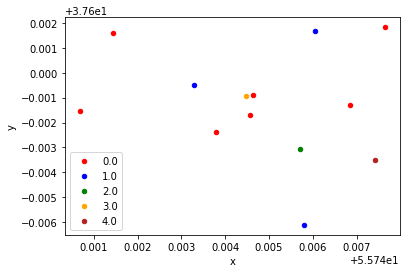

In [ ]:
#df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue', 2:'green', 3:'orange', 4:'firebrick'}
fig, ax = pyplot.subplots()
grouped = datasm.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Постамат произвольно расположен в зелёной точке.  
Значит у нас семь красных объектов и три синих объекта поблизости.  
Жёлтым переместили постамат, усреднив координаты x и y.  
Учитывая важность объектов у нас сместился постамат в коричневую точку. 
